# SUPERMARKET SALES ANALYSIS

## Configuración inicial

### Importando librerias

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy

### Definiendo variables globales

In [120]:
global df_ventas
global df_ventas_limpio

### *Importando la Base de Datos .csv*

In [121]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv('reporte_ventas.csv', sep = ',')
obtencion_datos()

In [122]:
df_ventas

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8949,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Ropa,Jeans,522.75,607.40,0.100,546.66,4,2186.64,95.64
8950,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.58,0.100,17.62,4,70.48,12.32
8951,2021-12-04,2021-12-07,Envío rápido,Isis Alves,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,48.83,63.41,0.000,63.41,6,380.46,87.48
8952,2021-06-15,2021-06-15,24 horas,Gustavo Henrique Porto,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Camisetas,395.45,440.46,0.075,407.43,5,2037.15,59.90


## AED y limpieza de los datos

### Dataset Inicial

In [123]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int64  
 15  tota

In [124]:
print('Nulos por columna')
df_ventas.isnull().sum()

Nulos por columna


fecha_pedido             0
fecha_envio              0
modo_envio               0
nombre_cliente           2
segmento_cliente         0
ciudad                   0
estado                   0
region                   0
departamento_producto    0
tipo_producto            0
precio_base              0
precio_unit_sin_desc     0
descuento                0
precio_unit_venta        0
cantidad_pedido          0
total_venta              0
total_ganancia           0
dtype: int64

In [125]:
print('Cantidad de duplicados: ',df_ventas.duplicated().sum())

Cantidad de duplicados:  15


In [126]:
criterio = df_ventas['nombre_cliente'] == 'prueba'
df_ventas[criterio]

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
12,2022-04-16,2022-04-21,Entrega estándar,prueba,B2C,São João de Meriti,Rio de Janeiro,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.59,0.1,17.63,3,52.89,9.27
2634,2022-11-19,2022-11-25,Entrega estándar,prueba,B2B,Ribeirão Pires,São Paulo,Sureste,Ropa,Vestidos,13.27,16.80,0.0,16.80,4,67.20,14.12
4001,2022-08-15,2022-08-22,Entrega estándar,prueba,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Zapatillas,471.11,526.74,0.1,474.07,3,1422.21,8.88
4037,2021-11-15,2021-11-19,Entrega estándar,prueba,B2C,Belo Horizonte,Minas Gerais,Sureste,Electrónicos,Lámparas LED,7.22,6.50,0.4,3.90,2,7.80,-6.64


### Limpieza de los datos

In [127]:
#Formateamos el tipo de dato de las fechas a uno adecuado
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

#Eliminar repetidos
df_ventas_limpio = df_ventas.drop_duplicates()

#eliminamos registros de prueba
def eliminar_registros_prueba(df):
  return df.drop(df[df['nombre_cliente'] == 'prueba'].index)
df_ventas_limpio = eliminar_registros_prueba(df_ventas_limpio)

#reiniciamos el index
df_ventas_limpio.reset_index(inplace=True)
df_ventas_limpio.drop(columns=['index'], inplace=True)

#Reemplazamos los nombres de clientes NaN por el valor "missing"
df_ventas_limpio['nombre_cliente'].fillna('missing', inplace=True)


### Dataset limpio

In [128]:
df_ventas_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8935 entries, 0 to 8934
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8935 non-null   datetime64[ns]
 1   fecha_envio            8935 non-null   datetime64[ns]
 2   modo_envio             8935 non-null   object        
 3   nombre_cliente         8935 non-null   object        
 4   segmento_cliente       8935 non-null   object        
 5   ciudad                 8935 non-null   object        
 6   estado                 8935 non-null   object        
 7   region                 8935 non-null   object        
 8   departamento_producto  8935 non-null   object        
 9   tipo_producto          8935 non-null   object        
 10  precio_base            8935 non-null   float64       
 11  precio_unit_sin_desc   8935 non-null   float64       
 12  descuento              8935 non-null   float64       
 13  pre

## INSIGHTS

### 1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

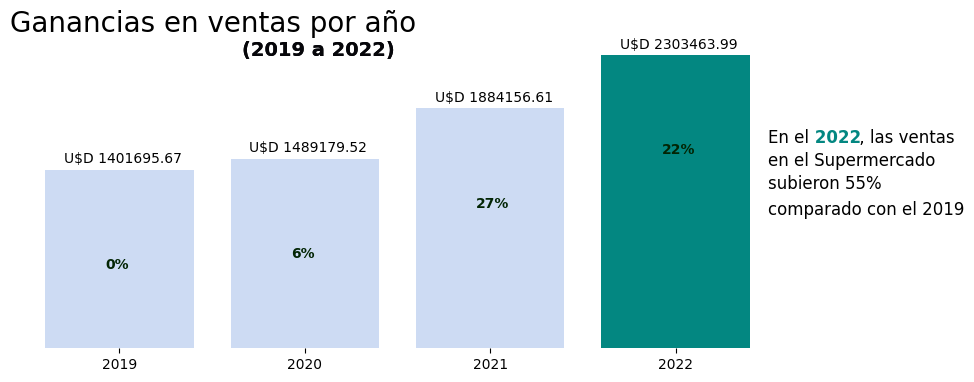

In [129]:
#Code here
def pregunta_1():
  df_ventas_ano = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
  df_ventas_ano['año'] = df_ventas_ano['fecha_pedido'].dt.year
  df_ventas_ano.drop('fecha_pedido', axis=1, inplace=True)
  df_ventas_ano = df_ventas_ano.groupby('año').aggregate('sum')

  #Se calculan conclusionies en cuanto a los cambios percibidos cada año
  increment = df_ventas_ano.copy()
  increment['percent'] = df_ventas_ano['total_venta'].pct_change()*100
  increment['percent'].fillna(0, inplace=True)

  fig, ax = plt.subplots(figsize=(10,4))
  x = df_ventas_ano.index
  y = df_ventas_ano['total_venta']
  ax.bar(x,y, width=0.8, color=['#CDDBF3','#CDDBF3','#CDDBF3','#038781'])
  plt.xticks([2019, 2020, 2021, 2022])
  plt.box(False)
  plt.gca().yaxis.set_visible(False)
  plt.title('Ganancias en ventas por año', loc='left', fontsize=20)

  for index, bar in enumerate(ax.patches):
    x = bar.get_x() + 0.1
    y = bar.get_height()
    valor = f'U$D {y}'
    y_position = y + 50000
    ax.text(x,y_position,valor)
    ax.text(x+0.225,y-780000, f'{increment['percent'].iloc[index]:.0f}%', color='#022504', weight='bold')

  ax.text(0.3, 0.95, '(2019 a 2022)', transform=ax.transAxes, color='#06060a', weight='bold', fontsize=14)
  ax.text(0.3, 0.95, '(2019 a 2022)', transform=ax.transAxes, color='#06060a', weight='bold', fontsize=14)
  ax.text(2022.5,16.1e5,"En el", fontsize=12)
  ax.text(2022.72,16.1e5," 2022", fontsize=12,color='#038781', weight="bold")
  ax.text(2022.96,16.1e5," , las ventas", fontsize=12)
  ax.text(2022.5,14.3e5,"en el Supermercado", fontsize=12)
  ax.text(2022.5,12.5e5,"subieron 55%", fontsize=12)
  ax.text(2022.5,10.5e5,"comparado con el 2019", fontsize=12)

pregunta_1()


#### Conclusión

El 2022, fue el mejor año en que el supermercado tuvo un mejor su desempeño en cuanto a las ganancias reales por ventas realizadas. Sin embargo, apreciamos un incremento en ganancias de ventas cada año transcurrido.

### 2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?

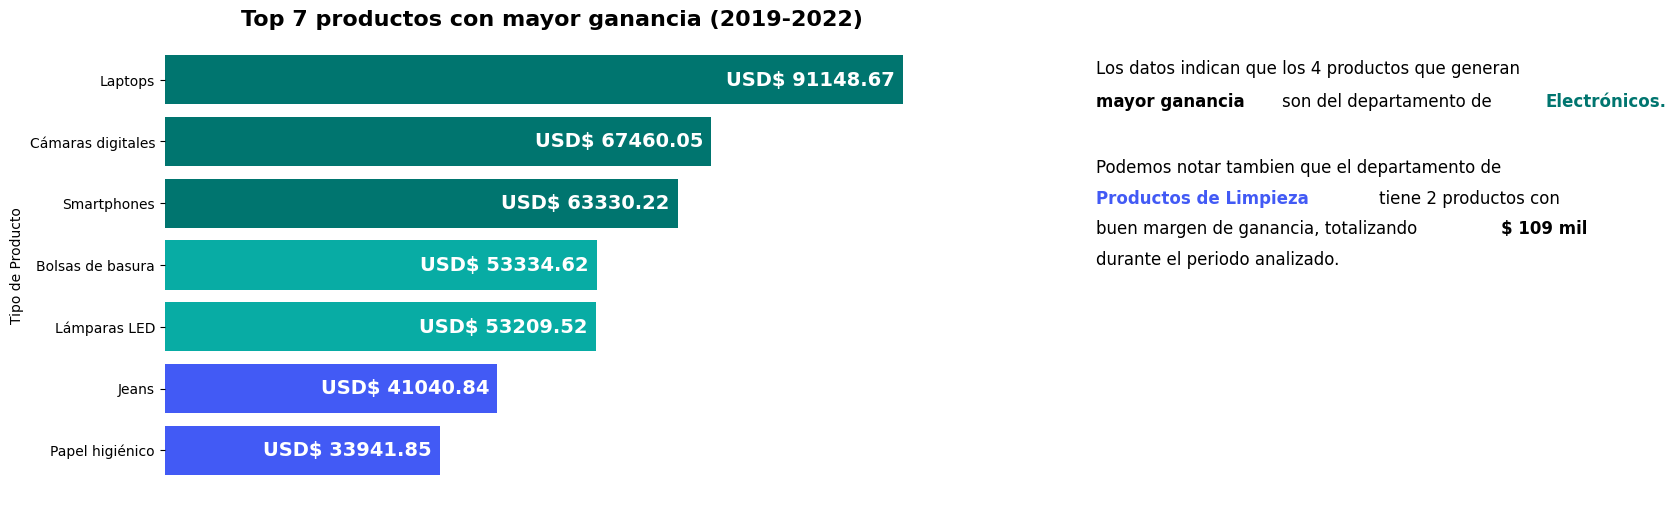

In [130]:
#Code here
def pregunta_2():
  # Definimos las variables globales
  global df_ventas_limpio
  df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()
  df_top_ganancias = df_top_ganancias.groupby('tipo_producto').agg({'total_ganancia': 'sum'}).reset_index()
  df_top_ganancias = df_top_ganancias.sort_values('total_ganancia', ascending=False)
  # return df_top_ganancias[df_top_ganancias['total_ganancia'] > 0]
  df_top_ganancias = df_top_ganancias.head(7)
  df_top_ganancias = df_top_ganancias.sort_values('total_ganancia', ascending=True)
  # return df_top_ganancias
  # print(df_top_ganancias.to_string(index=False))
  # Configuración de la figura y el eje
  fig, ax = plt.subplots(figsize=(10, 6))
  ejeX = df_top_ganancias['tipo_producto']
  ejeY = df_top_ganancias['total_ganancia']
  colores = ['#425af5','#425af5', '#08aca4','#08aca4','#00756f','#00756f','#00756f']
  barras = ax.barh(ejeX, ejeY, color=colores, align='center')
  for barra in barras:
    width = barra.get_width()
    ax.text(width-1000, barra.get_y() + barra.get_height() / 2, f'USD$ {width:.2f}', ha='right', va='center', fontsize=14, color='white', weight='bold')
  ax.set_title('Top 7 productos con mayor ganancia (2019-2022)', fontsize=16, weight ='bold')
  ax.set_ylabel('Tipo de Producto')
  ax.set_xlabel('Total de Ganancias')

  plt.box(False)
  plt.gca().xaxis.set_visible(False)

  ax.text(11.5e4,6.1,"Los datos indican que los 4 productos que generan", fontsize=12)
  ax.text(11.5e4,5.56,"mayor ganancia", fontsize=12, weight ='bold')
  ax.text(13.8e4,5.56,"son del departamento de", fontsize =12)
  ax.text(17.05e4,5.56,"Electrónicos.", fontsize =12, color='#00756f', weight='bold')
  ax.text(11.5e4,4.5,"Podemos notar tambien que el departamento de", fontsize =12)
  ax.text(11.5e4,4,"Productos de Limpieza", fontsize =12, color='#425af5', weight ='bold')
  ax.text(15e4,4,"tiene 2 productos con", fontsize =12)
  ax.text(11.5e4,3.5,"buen margen de ganancia, totalizando", fontsize =12)
  ax.text(16.5e4,3.5,"$ 109 mil", fontsize=12, weight='bold')
  ax.text(11.5e4,3,"durante el periodo analizado.", fontsize =12)

  # Mostrar el gráfico
  plt.show()

pregunta_2()

#### Conclusión

Los datos indican que los 4 productos que generan mayor ganancia son los del departamento de Electrónicos.
Podemos notar tamquén que el departamente de productos de limpieza tiene 2 productos con buen margen de ganancia totalizando U$D 109k
durante el periodo analizado

### 3. ¿Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

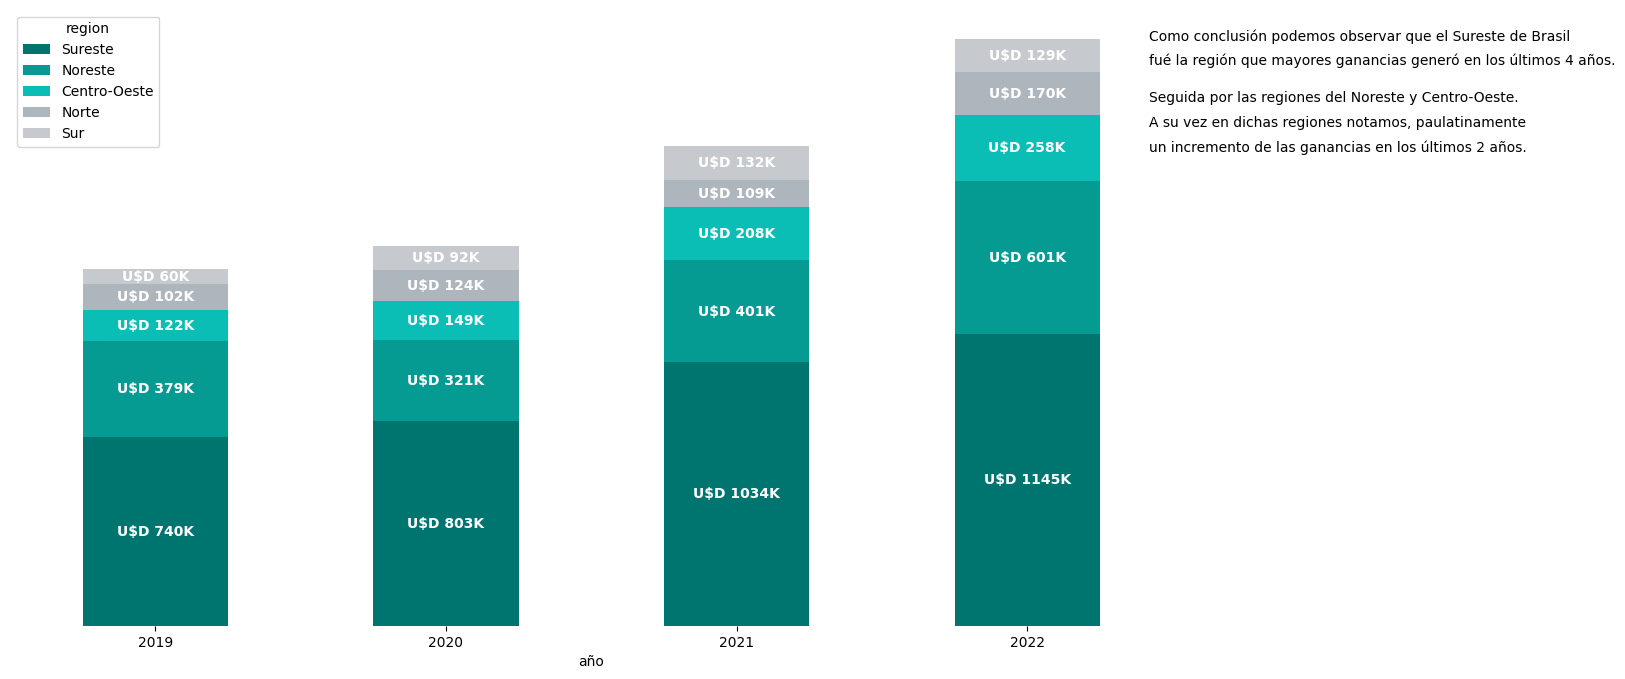

In [131]:
#Code here
def pregunta_3():
  #Preparamos los datos
  import math
  global df_ventas_limpio
  df_ventas_anos_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
  df_ventas_anos_region['año'] = df_ventas_anos_region['fecha_pedido'].dt.year
  df_ventas_anos_region.drop('fecha_pedido', axis=1, inplace=True)
  columna = df_ventas_anos_region['año']
  fila = df_ventas_anos_region['region']
  total_venta = df_ventas_anos_region['total_venta']
  df_ventas_anos_region = pd.crosstab(columna, fila, values=total_venta, aggfunc='sum')
  #Reorganizamos el orden para organizar mejor la información del gráfico
  column_order = ['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']
  df_ventas_anos_region = df_ventas_anos_region[column_order]
  #Graficamos
  colores=['#00756f', '#059a92', '#0abeb5', '#adb5bd', '#C6C9CD']
  ax = df_ventas_anos_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)
  plt.xticks(rotation=0)
  for container in ax.containers:
    labels = []
    for valor in container:
      labels.append(f'U$D {math.ceil(round(valor.get_height(), -3))}'[:-3]+'K')
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontweight='bold')
  
  plt.box(False)
  plt.gca().yaxis.set_visible(False)
  #   
  ax.text(0.98, 0.95, 'Como conclusión podemos observar que el Sureste de Brasil', transform=ax.transAxes)
  ax.text(0.98, 0.91, 'fué la región que mayores ganancias generó en los últimos 4 años.', transform=ax.transAxes)
  ax.text(0.98, 0.85, 'Seguida por las regiones del Noreste y Centro-Oeste.', transform=ax.transAxes)
  ax.text(0.98, 0.81, 'A su vez en dichas regiones notamos, paulatinamente', transform=ax.transAxes)
  ax.text(0.98, 0.77, 'un incremento de las ganancias en los últimos 2 años.', transform=ax.transAxes)
  

pregunta_3()

#### Conclusión

Como conclusión podemos observar que el Sureste de Brasil fué la región que mayores ganancias generó en los últimos 4 años. Seguida por las regiones del Noreste y Centro-Oeste. A su vez en dichas regiones notamos, paulatinamente, un incremento de las ganancias en los últimos 2 años.

### 4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

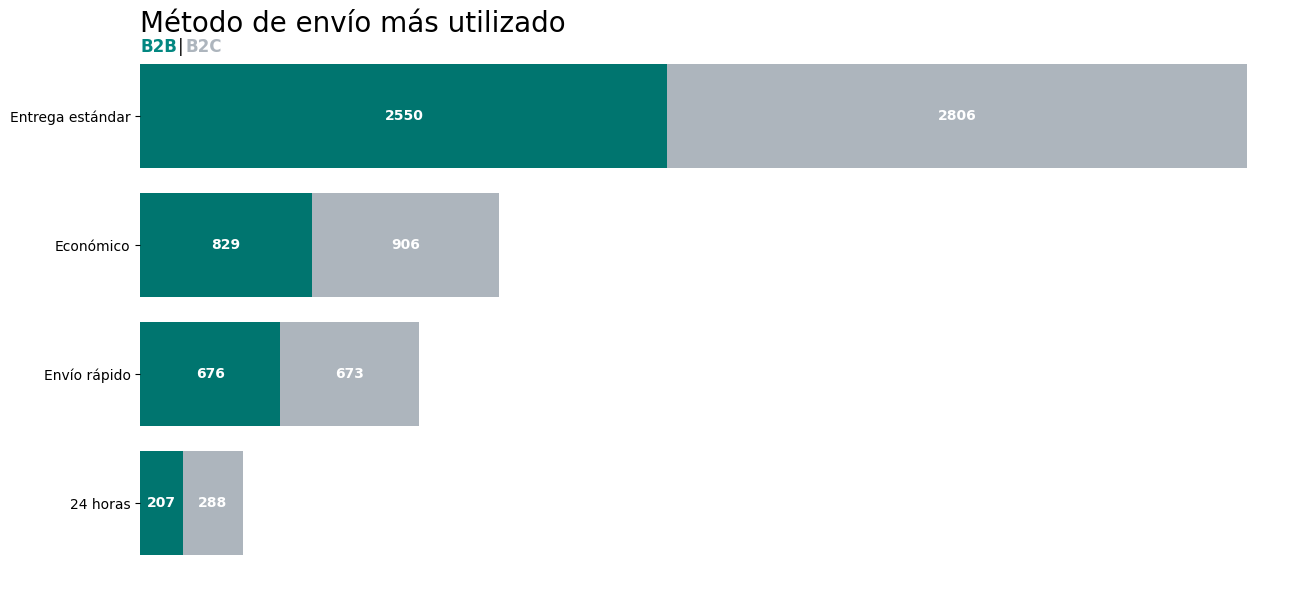

In [132]:
#Code here
def pregunta_4():
  #Preparando los datos
  global df_ventas_limpio
  df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
  modo_envio = df_modo_envio['modo_envio']
  segmento = df_modo_envio['segmento_cliente']
  df_modo_envio = pd.crosstab(index=modo_envio, columns=segmento).sort_values('B2B')
  #Graficando
  fig, ax = plt.subplots(figsize=(15,7))
  plt.box(False)
  plt.gca().xaxis.set_visible(False)
  plt.title('Método de envío más utilizado', loc='left', fontsize=20)
  plt.text(0,3.5,'B2B', color='#038781', fontweight='bold', fontsize=12)
  plt.text(180,3.5,'|', fontsize=12)
  plt.text(220,3.5,'B2C', color='#adb5bd', fontweight='bold', fontsize=12)
  x = df_modo_envio.index
  y1 = df_modo_envio['B2B']
  y2 = df_modo_envio['B2C']
  ax.barh(x, y1, color='#00756f')
  ax.barh(x, y2, left=y1, color='#adb5bd')
  for container in ax.containers:
    ax.bar_label(container, label_type='center', labels = (), color="white", fontweight="bold")

pregunta_4()

#### Conclusión

El método de envío preferido por sus clientes (B2B|B2C) es el de "Entrega estándar".

### 5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo?

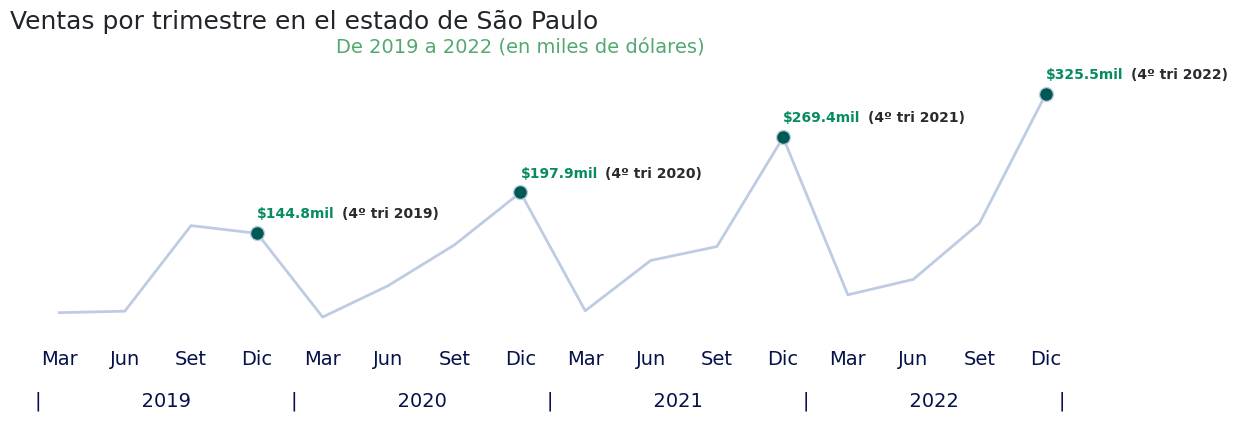

In [133]:
#Code here
def pregunta_5():
  # # Definimos las variables globales
  global df_ventas_limpio
  df_ventas_sp = df_ventas_limpio.copy()
  df_ventas_sp = df_ventas_sp.query('estado == "São Paulo"')[["fecha_pedido", "total_venta"]]
  # Establece la columna fecha_pedido como índice del DataFrame df_ventas_sp
  df_ventas_sp.set_index('fecha_pedido', inplace=True)
  # Aplica la función sum en el dataframe para calcular la venta total por trimestre, redondea a dos decimales
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
  df_ventas_sp['total_venta'] = round(df_ventas_sp['total_venta'] / 1e3, 2)
  # Restablece el indice
  df_ventas_sp = df_ventas_sp.reset_index()

  # Área del gráfico
  fig, ax = plt.subplots(figsize=(14, 4))

  # Gráfico de linea
  puntos_a_marcar = [True if mes.month == 12 else False for mes in pd.to_datetime(df_ventas_sp['fecha_pedido'])]
  ax.plot(df_ventas_sp['fecha_pedido'], df_ventas_sp['total_venta'], lw=2, color='#BECCE3', marker='o',
  markersize=10, markerfacecolor='#015954', markevery=puntos_a_marcar)

  # customizer
  ax.set_title('Ventas por trimestre en el estado de São Paulo', fontsize=18, color='#212529', loc='left')
  ax.text(0.3, 0.95, 'De 2019 a 2022 (en miles de dólares)', transform=ax.transAxes, color='#53a871', fontsize=14)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_yticks([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor='#05114a')
  ax.tick_params(axis='both', which='both', length=0)
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  plt.ylim(0, 400)

  # Definiendo el intervalo entre trimestres y colocando los nombres de los meses en los labels
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  x_labels = ['Mar', 'Jun', 'Set', 'Dic'] * 4
  ax.set_xticks(df_ventas_sp.fecha_pedido)
  ax.set_xticklabels(x_labels, ha='center')

  # Ajustando el eje x colocando un nivel encima de la granularidad por medio de la exposición del año
  texto = [16 * " " + str(i) + 16 * " " for i in range(2019, 2023)]
  ax.text(ax.get_xbound()[0] + 35, -80,
  f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color='#05114a')

  # Etiquetas trimestrales (...)
  for i in range(3, len(df_ventas_sp["total_venta"]), 4):
      ax.text(x=ax.get_xticks()[i], y=df_ventas_sp['total_venta'][i] + 20,
      s=f"${df_ventas_sp['total_venta'][i].round(1)}mil", color='#078c62', weight='bold', fontsize=10)
      ax.text(x=ax.get_xticks()[i] + 118, y=df_ventas_sp['total_venta'][i] + 20,
      s=f"(4º tri {2019 + int(i/4)})", color='#292a2e', weight='bold', fontsize=10)

pregunta_5()

#### Conclusión
En el estado de São Paulo en el mes de Diciembre de los último 3 años, fue en donde más ganancias por ventas se obtuvieron. Sin embargo, durante los primeros trimestres, las ventas disminuyeron.

### 6. ¿Existe otro insight que puedas proporcionar?

In [134]:
#Code here
df_ventas_limpio

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8930,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.000,123.22,1,123.22,25.88
8931,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.000,271.97,1,271.97,48.96
8932,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.000,140.15,5,700.75,94.60
8933,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.100,28.61,3,85.83,6.96
